# Script to scan K gap in Athos

In [13]:
import epics as ep
import h5py as h5
import numpy as np
import matplotlib.pyplot as plt
from time import sleep
from IPython.display import clear_output, display

## User inputs

In [29]:
Gap_set_PV = "SATUN21-UIND030:K_SET"
detector = "SATFE10-LSCP2-FNS:CH3:VAL_GET"
k_from = 0.9
k_to = 2.8
steps = 15
shots = 100
fN = 'Fe_filter.h5'

## Scan

In [ ]:
k_set = np.linspace(k_from, k_to, steps)
Data = []
for i in range(0, steps):
    ep.caput(Gap_set_PV, k_set[i])
    clear_output(wait=True)    
    print('Gap set '+ str(k_set[i])+ ', step '+ str(i)+ ' of'+ str(steps))
    sleep(10)
    tmp_data = []
    for j in range(0,shots):
        tmp_data.append(ep.caget(detector))
        sleep(1)
    Data.append(tmp_data)


Gap set 1.0357142857142858, step 1 of15


In [20]:
Data = np.asarray(Data)

<Container object of 3 artists>

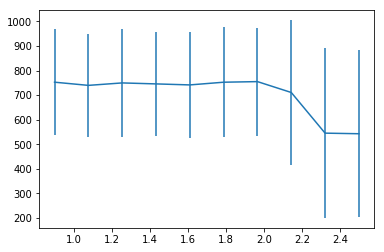

In [27]:
plt.figure()
plt.errorbar(k_set, Data.mean(axis=0), Data.std(axis=0), label = detector)
plt.xlabel('K set')
plt.ylabel('Intensity [arb]')
plt.legend()
plt.grid(True)
plt.title(Gap_set_PV)

## Save Data

In [25]:
DataOut = {
        "Gap_set_PV": Gap_set_PV,
        "detector": detector,
        "k_from":k_from,
        "k_to":k_to,
        "Data": Data
}

In [26]:
with h5.File(fN,'w-') as fh:
    for k,v in DataOut.items():
        fh[k] = v